In [2]:
import pandas as pd
import numpy as np
from numpy import newaxis

In [75]:
df = pd.read_csv('../CSVData/emotion_data1.csv')
df.head(5)

,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(0, 5)","(0, 6)","(0, 7)","(0, 8)","(0, 9)",...,"(47, 39)","(47, 40)","(47, 41)","(47, 42)","(47, 43)","(47, 44)","(47, 45)","(47, 46)","(47, 47)",emotion
0,50,32,15,11,12,10,10,8,15,10,...,157,156,152,148,151,141,143,136,83,angry
1,29,24,29,11,15,22,26,11,7,17,...,109,165,148,75,49,33,15,24,24,angry
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,angry
3,155,138,98,112,94,97,111,107,101,84,...,97,95,92,94,101,108,111,112,109,angry
4,211,215,220,221,219,216,213,210,207,205,...,170,168,162,170,169,160,159,156,152,angry


In [76]:
x = df.drop(['emotion'], axis=1)
x = np.array(x)
print(x.shape)
x_train = []
for entry in x:
    index = 0
    new_dimension = []
    for i in range(48):
        inner_dim = []
        for j in range(48):
            inner_dim.append(entry[index])
            index += 1
        new_dimension.append(inner_dim)
    x_train.append(new_dimension)
            
x_train = np.array(x_train)
X_train = x_train[..., newaxis]
print(X_train.shape)
print(x.shape)

(28709, 2304)
(28709, 48, 48, 1)
(28709, 2304)


In [71]:
df['emotion'].replace(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'], [0, 1, 2, 3, 4, 5, 6], inplace=True)
y = df['emotion']
y_train = np.array(y)
print(y_train.shape)

(28709,)


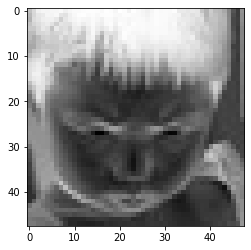

In [72]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [10]:
#preprocess test data

In [35]:
import os
import csv
import cv2

In [36]:
f = open('../CSVData/emotion_data1test.csv', 'w')
writer = csv.writer(f)
headers = []
for i in range(48):
    for j in range(48):
        headers.append("(" + str(i) + ", " + str(j) + ")")
headers.append('emotion')
writer.writerow(headers)

24393

In [51]:
test_df = pd.read_csv('../CSVData/emotion_data1test.csv')
test_df.head()

,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(0, 5)","(0, 6)","(0, 7)","(0, 8)","(0, 9)",...,"(47, 39)","(47, 40)","(47, 41)","(47, 42)","(47, 43)","(47, 44)","(47, 45)","(47, 46)","(47, 47)",emotion
0,46,34,26,23,12,32,35,26,26,38,...,150,135,164,168,131,128,165,180,189,angry
1,55,33,54,32,26,21,50,29,38,45,...,224,218,222,224,222,202,132,163,187,angry
2,123,123,126,131,124,69,109,149,159,174,...,5,3,5,4,3,2,4,4,3,angry
3,255,255,255,255,255,255,255,255,255,251,...,177,174,168,88,19,40,37,37,37,angry
4,127,121,124,137,123,118,120,111,111,109,...,177,186,174,172,226,131,53,118,233,angry


In [46]:
root = os.listdir('../test')
print(root)
for file in root:
    images = os.listdir('../test/' + file)
    for image in images:
        img = cv2.imread('../test/' + file + '/' + image, 0)
        data = []
        for row in range(48):
            for col in range(48):
                data.append(img[row][col])
                
        data.append(file)
        writer.writerow(data)
    


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [39]:
#load in test data

In [52]:
x = test_df.drop(['emotion'], axis=1)
x_test = np.array(x)
X_test = []
for entry in x_test:
    index = 0
    new_dimension = []
    for i in range(48):
        inner_dim = []
        for j in range(48):
            inner_dim.append(entry[index])
            index += 1
        new_dimension.append(inner_dim)
    X_test.append(new_dimension)
    
X_test = np.array(X_test)
print(x_test.shape)

(28744, 2304)


In [53]:
print(X_test.shape)

(28744, 48, 48)


In [62]:
X_test = X_test[..., newaxis]

In [63]:
print(X_test.shape)

(28744, 48, 48, 1)


In [54]:
test_df['emotion'].replace(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'], [0, 1, 2, 3, 4, 5, 6], inplace=True)
y = test_df['emotion']
y_test = np.array(y)

[0 0 0 ... 6 6 6]


In [55]:
print(len(y_test))

28744


In [73]:
#normalize the data
#import tensorflow as tf
#X_train = tf.keras.utils.normalize(X_train)
#X_test = tf.keras.utils.normalize(X_test)
#NEver mind. Didn't work :(

In [67]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
def create_model():
    model = Sequential([
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Dropout(0.25),
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Dropout(0.25),
        Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Dropout(0.25),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.25),
        Dense(256, activation='relu'),
        Dropout(0.25),
        Dense(units=7, activation='softmax'),
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

In [81]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(units=7, activation='softmax'),
])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [82]:
model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
898/898 [==============================] - 302s 335ms/step - loss: 2.1970 - accuracy: 0.2435
Epoch 2/10
898/898 [==============================] - 296s 330ms/step - loss: 1.8527 - accuracy: 0.2506
Epoch 3/10
898/898 [==============================] - 286s 318ms/step - loss: 1.8237 - accuracy: 0.2511
Epoch 4/10
898/898 [==============================] - 291s 324ms/step - loss: 1.8159 - accuracy: 0.2512
Epoch 5/10
898/898 [==============================] - 306s 341ms/step - loss: 1.8147 - accuracy: 0.2512
Epoch 6/10
898/898 [==============================] - 295s 328ms/step - loss: 1.8114 - accuracy: 0.2514
Epoch 7/10
860/898 [===========================>..] - ETA: 12s - loss: 1.8105 - accuracy: 0.2515

KeyboardInterrupt: 

In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

In [83]:
model2 = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(units=7, activation='softmax'),
])
model2.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [84]:
model2.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
898/898 [==============================] - 304s 338ms/step - loss: 2.2131 - accuracy: 0.2399
Epoch 2/20
898/898 [==============================] - 314s 350ms/step - loss: 1.7967 - accuracy: 0.2578
Epoch 3/20
898/898 [==============================] - 376s 419ms/step - loss: 1.7414 - accuracy: 0.2846
Epoch 4/20
898/898 [==============================] - 512s 570ms/step - loss: 1.6650 - accuracy: 0.3358
Epoch 5/20
898/898 [==============================] - 512s 570ms/step - loss: 1.6004 - accuracy: 0.3730
Epoch 6/20
898/898 [==============================] - 512s 570ms/step - loss: 1.5431 - accuracy: 0.4021
Epoch 7/20
898/898 [==============================] - 515s 573ms/step - loss: 1.4949 - accuracy: 0.4274
Epoch 8/20
898/898 [==============================] - 516s 575ms/step - loss: 1.4668 - accuracy: 0.4353
Epoch 9/20
898/898 [==============================] - 514s 572ms/step - loss: 1.4319 - accuracy: 0.4504
Epoch 10/20
898/898 [==============================] - 525s 585m

In [85]:
val_loss, val_acc = model2.evaluate(X_test, y_test)
print(val_loss, val_acc)

899/899 [==============================] - 111s 120ms/step - loss: 1.9646 - accuracy: 0.1737
1.964582920074463 0.17367102205753326


In [ ]:
model3 = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(units=7, activation='softmax'),
])
model3.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model3.fit(X_train, y_train, epochs=20, verbose=1)

In [ ]:
val_loss, val_acc = model3.evaluate(X_test, y_test)
print(val_loss, val_acc)

In [ ]:
from sklearn.model_selection import GridSearchCV
epochs = [10, 20, 50, 100]
params = dict(epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))